# ***Proyecto Final ***

El siguiente proyecto tiene como finalidad predecir el punto de roció, con los datos de entrada obtenidos a partir de la basa de datos “datoss_captacion"

El dataset será utilizado para regresión  y para clasificación

In [ ]:
# Importamos algunas de las librerias
import pandas as pd
import numpy as np


# cargar los datos

data = pd.read_excel('/content/Copia de datos_captacion.xlsx', sheet_name='Hoja1')
data.head()

,Temp celda1,Temp celda2,Temp celda3,Temp celda4,Temp Ambiente,Humedad,punto de rocio,prediccion rna
0,27.12,24.06,22.19,19.12,27.9,42,14.71,14.736070
1,27.12,23.69,21.50,18.50,27.9,42,14.71,14.731572
2,27.06,23.12,20.87,18.00,27.9,42,14.71,14.728256
3,27.00,22.69,20.25,17.50,27.9,42,14.71,14.724046
4,26.94,22.12,19.69,17.06,27.9,42,14.71,14.720976


# Prepocesamiento

In [ ]:
nombres_columnas = data.iloc[0].tolist()

# Mostramos en pantalla
data.head()


,Temp celda1,Temp celda2,Temp celda3,Temp celda4,Temp Ambiente,Humedad,punto de rocio,prediccion rna
0,27.12,24.06,22.19,19.12,27.9,42,14.71,14.736070
1,27.12,23.69,21.50,18.50,27.9,42,14.71,14.731572
2,27.06,23.12,20.87,18.00,27.9,42,14.71,14.728256
3,27.00,22.69,20.25,17.50,27.9,42,14.71,14.724046
4,26.94,22.12,19.69,17.06,27.9,42,14.71,14.720976


In [ ]:
# prompt: elimina una columna

data.drop('prediccion rna ', axis=1, inplace=True)

In [ ]:
# Agregar una nueva columna 'C' con los valores aleatorios
data['target'] = data['Humedad'].apply(lambda x: 1 if x > 40 else 0) #30

data.head()

,Temp celda1,Temp celda2,Temp celda3,Temp celda4,Temp Ambiente,Humedad,punto de rocio,target
0,27.12,24.06,22.19,19.12,27.9,42,14.71,1
1,27.12,23.69,21.50,18.50,27.9,42,14.71,1
2,27.06,23.12,20.87,18.00,27.9,42,14.71,1
3,27.00,22.69,20.25,17.50,27.9,42,14.71,1
4,26.94,22.12,19.69,17.06,27.9,42,14.71,1


In [ ]:
#tipo de variable de cada columna
#tipo de variable por cada columna
for columna in data.columns:
    tipo_variable = data[columna].dtype
    print(f"La columna '{columna}' es de tipo: {tipo_variable}")

La columna 'Temp celda1' es de tipo: float64
La columna 'Temp celda2' es de tipo: float64
La columna 'Temp celda3' es de tipo: float64
La columna 'Temp celda4' es de tipo: float64
La columna 'Temp Ambiente' es de tipo: float64
La columna 'Humedad' es de tipo: int64
La columna 'punto de rocio' es de tipo: float64
La columna 'target' es de tipo: int64


In [ ]:
# convertir target de entero a flotante
data['target'] = data['target'].astype(float)

In [ ]:
data = data.drop(data[data['Temp celda1'] < 0].index)
data = data.drop(data[data['Temp celda2'] < 0].index)
data = data.drop(data[data['Temp celda3'] < 0].index)
data = data.drop(data[data['Temp celda4'] < 0].index)

In [ ]:
# ver datos faltantes
faltantes= data.isnull().sum()
print(faltantes)

Temp celda1       0
Temp celda2       0
Temp celda3       0
Temp celda4       0
Temp Ambiente     0
Humedad           0
punto de rocio    0
target            0
dtype: int64


In [ ]:
X_data=data

# **Escalamiento de datos **

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler = MinMaxScaler()
X = X_data.iloc[:, :-2].values

X = scaler.fit_transform(X)
y = data['punto de rocio'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.85,random_state= 400)

print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((525, 6), (525,))
Prueba: ((93, 6), (93,))


In [ ]:
#Score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Crear un objeto de regresión lineal
lr_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
lr_model.fit(X_train, y_train)
lr_model.score(X_train,y_train)

0.9886631976051291

# Validacion cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X_train, y_train, cv=5)

print(scores) #el score de cada uno de los 5 folds
print(np.mean(scores))#se toma el promedio de los 5

[0.98708161 0.98813089 0.98897672 0.98933388 0.98737058]
0.988178736480052


# **Prediccion en el conjunto de prueba y calcular la precisión**

In [ ]:
y_pred_test = lr_model.predict(X_test)

In [ ]:
print(f"Valores de prueba:\n{y_test[:93]}")
print(f"Valores predichos:\n{np.round(y_pred_test[:93],2)}")

Valores de prueba:
[14.04 14.69 13.38 14.39 14.29 13.18 13.48 15.35 14.09 14.09 15.25 15.25
 14.85 14.07 14.85 13.08 14.79 14.04 14.19 13.28 13.38 13.28 13.08 14.99
 14.17 14.64 15.49 13.38 14.07 13.48 14.07 13.57 14.55 14.47 14.85 14.75
 14.55 12.98 14.19 13.38 14.09 15.07 13.48 14.71 13.38 13.09 14.87 14.09
 14.49 13.38 14.71 15.39 14.59 13.08 13.15 13.18 14.59 13.28 14.59 14.09
 14.49 13.47 13.67 14.14 13.25 13.08 13.47 14.95 14.79 14.89 14.69 14.69
 12.98 14.59 14.89 15.35 15.09 13.38 14.81 15.39 14.39 15.15 15.19 15.59
 13.25 14.17 14.04 12.98 14.39 14.07 14.59 14.69 14.07]
Valores predichos:
[13.99 14.71 13.43 14.35 14.25 13.21 13.53 15.35 14.06 14.05 15.25 15.31
 14.91 14.05 14.91 13.1  14.79 13.98 14.16 13.31 13.53 13.32 13.13 14.95
 14.12 14.63 15.56 13.44 14.14 13.43 14.05 13.61 14.6  14.42 14.91 14.91
 14.7  13.03 14.16 13.42 14.06 14.87 13.53 14.66 13.53 13.12 14.91 14.05
 14.47 13.42 14.74 15.36 14.58 13.1  13.14 13.21 14.58 13.31 14.59 14.06
 14.48 13.41 13.61 13.98 13.24

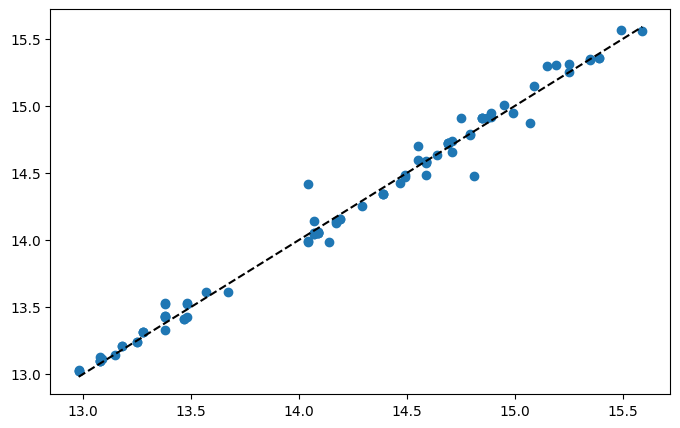

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test[:93], y_pred_test[:93])
plt.plot([min(y_test[:93]), max(y_test[:93])], [min(y_test[:93]), max(y_test[:93])], 'k--')  # <--- esta línea
plt.show()

# Red neuronal artificial

# Datos escalados

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler = MinMaxScaler()
X = X_data.iloc[:, :-2].values

X = scaler.fit_transform(X)
y = data['punto de rocio'].values



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.85,random_state= 400)

print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((525, 6), (525,))
Prueba: ((93, 6), (93,))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=1, input_shape=[6])
oculta2 = tf.keras.layers.Dense(units=5)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.05),
    loss='mean_squared_error'
)

In [ ]:
print("Comenzando entrenamiento...")
historial = modelo.fit(X_train, y_train, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


In [ ]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, modelo.predict(X_train))

17/17 [==============================] - 0s 2ms/step


0.9807596914193918

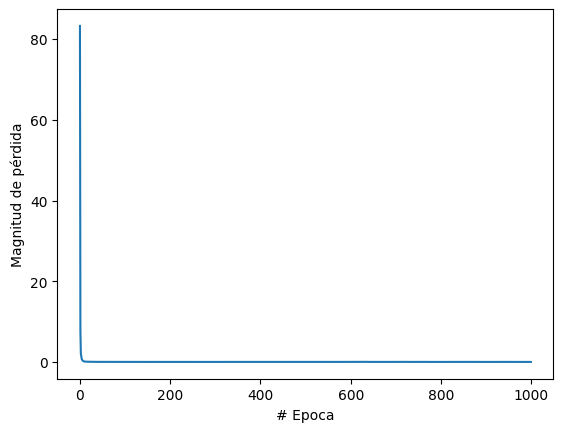

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [ ]:
y_pred_test = modelo.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [ ]:
print(f"Valores de prueba:\n{y_test[:6]}")
print(f"Valores predichos:\n{np.round(y_pred_test[:6],2)}")

Valores de prueba:
[14.04 14.69 13.38 14.39 14.29 13.18]
Valores predichos:
[[14.06]
 [14.78]
 [13.48]
 [14.4 ]
 [14.33]
 [13.28]]


**Formula de la Red Neuronal Artificial **

In [ ]:
print(oculta1.get_weights())

[array([[ 0.17463885],
       [-0.11730011],
       [ 0.04677742],
       [-0.07189184],
       [-1.3657081 ],
       [-2.17381   ]], dtype=float32), array([0.39606252], dtype=float32)]


In [ ]:
print(oculta2.get_weights())

[array([[ 0.02750131, -0.09149043,  0.74926746,  0.524251  ,  0.40984106]],
      dtype=float32), array([ 0.01208684,  1.4915427 , -1.95608   , -1.9224663 , -2.0222912 ],
      dtype=float32)]


In [ ]:
print(salida.get_weights())

[array([[ 0.01075512],
       [ 0.70069176],
       [-1.2582341 ],
       [-1.1893934 ],
       [-1.3109208 ]], dtype=float32), array([3.026477], dtype=float32)]


# Analisis de sensibilidad del modelo entrenado

In [ ]:
# Calcular la sensibilidad de segundo orden con respecto a los pesos del modelo
weights = modelo.get_weights()
sensitivity = []
for weight in weights:
    sensitivity.append(np.sum(weight * weight))
print(sensitivity)

[6.6422234, 0.15686552, 1.0133374, 13.836633, 5.207408, 9.159564]


# SVM

In [ ]:
X_data

,Temp celda1,Temp celda2,Temp celda3,Temp celda4,Temp Ambiente,Humedad,punto de rocio,target
0,27.12,24.06,22.19,19.12,27.9,42,14.71,1.0
1,27.12,23.69,21.50,18.50,27.9,42,14.71,1.0
2,27.06,23.12,20.87,18.00,27.9,42,14.71,1.0
3,27.00,22.69,20.25,17.50,27.9,42,14.71,1.0
4,26.94,22.12,19.69,17.06,27.9,42,14.71,1.0
...,...,...,...,...,...,...,...,...
942,4.13,7.06,3.56,0.06,30.8,32,13.48,0.0
1036,3.38,5.63,2.69,1.19,30.7,32,13.38,0.0
1037,3.56,6.06,3.38,2.94,30.7,32,13.38,0.0
1038,3.69,6.38,4.06,4.38,30.7,32,13.38,0.0


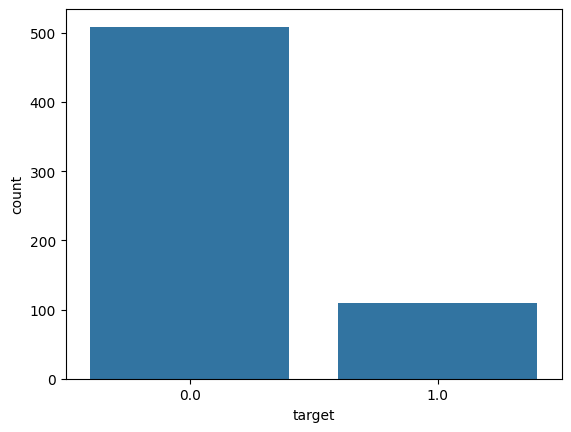

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.countplot(x = "target", data = X_data)
plt.show()

In [ ]:
No_optimo = X_data[X_data["target"]==1].shape[0]
Si_optimo = X_data[X_data["target"]==0].shape[0]
print("Hay {} Valores no optimos (clase 0)".format(No_optimo))
print("Hay {} Valores si optimos (clase 1)".format(Si_optimo))
total = No_optimo + Si_optimo
pf= (No_optimo / total)*100
pn= (Si_optimo / total)*100
print("No optimo 0 = {}%".format(np.round(pn,2)))
print("Si optimo 1 = {}%".format(np.round(pf,2)))

Hay 109 Valores no optimos (clase 0)
Hay 509 Valores si optimos (clase 1)
No optimo 0 = 82.36%
Si optimo 1 = 17.64%


In [ ]:
!pip install imbalanced-learn

In [ ]:
import imblearn
print(imblearn.__version__)

0.10.1




**Obtenemos la matriz de datos X y el vector de clases y correspondiente**


In [ ]:
X = X_data.loc[:, X_data.columns != "target"].values
y = data.loc[:, X_data.columns == "target"].values

print(f"Matriz de features: {X.shape}")
print(f"Matriz de etiquetas: {y.shape}")

Matriz de features: (618, 7)
Matriz de etiquetas: (618, 1)


**SMOTE**

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_oversampled, y_oversampled = oversample.fit_resample(X, y[y != 'unknown'])

**Verifiquemos la cantidad de datos ahora**

In [ ]:
from collections import Counter

print(f"Matriz de features: {X_oversampled.shape}")
print(f"Matriz de etiquetas: {y_oversampled.shape}")

print(Counter(y_oversampled))

Matriz de features: (1018, 7)
Matriz de etiquetas: (1018,)
Counter({1.0: 509, 0.0: 509})


**Separamos los datos en datos de entrenamiento (75%) y prueba (25%)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled,
                                                    test_size = 0.25,
                                                    random_state = 359)

print("El reparto de los datos submuestreados es el siguiente")
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

El reparto de los datos submuestreados es el siguiente
X_train:  763
X_test:  255
y_train:  763
y_test:  255


In [ ]:
classifier = SVC(C=1, kernel= 'rbf', random_state=0, gamma='scale')
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)

1.0

Probar el modelo

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
print(CM)

[[133   1]
 [  0 121]]


In [ ]:
acc = round((CM[1,1]+CM[0,0])/(CM[0,0] + CM[0,1]+CM[1,0] + CM[1,1])*100,3)
rec = round(CM[1,1]/(CM[1,0] + CM[1,1])*100,3)

print(f"Accuracy: {acc}")
print(f"Recall: {rec}")

Accuracy: 99.608
Recall: 100.0


In [ ]:
from sklearn.metrics import f1_score
# calcular F1
f1 = f1_score(y_test, y_pred)
print("El valor de F1 es:", f1)

El valor de F1 es: 0.9958847736625513


In [ ]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
              ]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
print("The best accuracy using gridSearch is", best_accuracy)

best_parameters = grid_search.best_params_
print("The best parameters for using this model is", best_parameters)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


The best accuracy using gridSearch is 1.0
The best parameters for using this model is {'C': 1, 'kernel': 'linear'}


In [ ]:
classifier_with_best_parameters =  SVC(C= best_parameters["C"],
                                       kernel= best_parameters["kernel"],
                                       random_state= 0)
classifier_with_best_parameters.fit(X_train, y_train)

y_pred_best_parameters = classifier_with_best_parameters.predict(X_test)

CM2 = confusion_matrix(y_test, y_pred_best_parameters)
print(CM2)

[[134   0]
 [  0 121]]


In [ ]:
acc = round((CM2[1,1]+CM2[0,0])/(CM2[0,0] + CM2[0,1]+CM2[1,0] + CM2[1,1])*100,3)
rec = round(CM2[1,1]/(CM2[1,0] + CM2[1,1])*100,3)

print(f"Accuracy: {acc}")
print(f"Recall: {rec}")

Accuracy: 100.0
Recall: 100.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


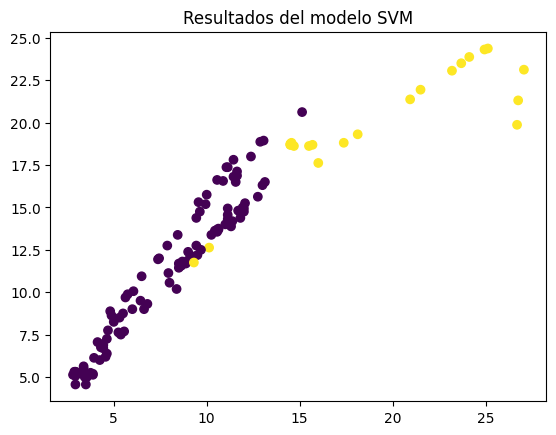

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#X = scaler.fit_transform(X_data)
#y = data['target'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un objeto de SVM con kernel radial
svm = SVC(kernel='rbf', C=10)

# Entrenar el modelo con los datos de entrenamiento
svm.fit(X_train, y_train)

# Evaluar el modelo con los datos de prueba
y_pred = svm.predict(X_test)

# Graficar los resultados
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)

plt.title('Resultados del modelo SVM')
plt.show()

# Arboles de decision

In [ ]:
X_data

,Temp celda1,Temp celda2,Temp celda3,Temp celda4,Temp Ambiente,Humedad,punto de rocio,target
0,27.12,24.06,22.19,19.12,27.9,42,14.71,1.0
1,27.12,23.69,21.50,18.50,27.9,42,14.71,1.0
2,27.06,23.12,20.87,18.00,27.9,42,14.71,1.0
3,27.00,22.69,20.25,17.50,27.9,42,14.71,1.0
4,26.94,22.12,19.69,17.06,27.9,42,14.71,1.0
...,...,...,...,...,...,...,...,...
942,4.13,7.06,3.56,0.06,30.8,32,13.48,0.0
1036,3.38,5.63,2.69,1.19,30.7,32,13.38,0.0
1037,3.56,6.06,3.38,2.94,30.7,32,13.38,0.0
1038,3.69,6.38,4.06,4.38,30.7,32,13.38,0.0


In [ ]:
feature_names = X_data.columns.to_list()[:-1]

X = X_data[feature_names].values    # Features
y = X_data['target'].values         # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=1) # 70% training and 30% test

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)



clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


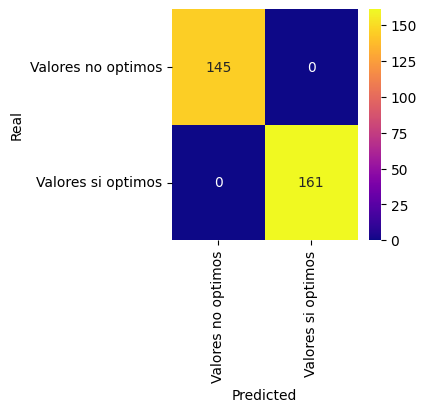

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

target_labels = ['Valores no optimos','Valores si optimos']

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g',
            xticklabels=target_labels,
            yticklabels=target_labels)
s_cm.set(xlabel='Predicted',ylabel='Real')
plt.show()

# Importancia de las features

In [ ]:
clf.feature_importances_

array([0., 0., 0., 0., 0., 1., 0.])

In [ ]:
importances_df = pd.DataFrame({'feature':feature_names,'importancia':np.round(clf.feature_importances_,3)})
importances_df.sort_values(by='importancia',ascending=False,inplace=True)
importances_df.set_index('feature')

,importancia
feature,
Humedad,1.0
Temp celda1,0.0
Temp celda2,0.0
Temp celda3,0.0
Temp celda4,0.0
Temp Ambiente,0.0
punto de rocio,0.0


In [ ]:
from sklearn import tree


text_representation = tree.export_text(decision_tree=clf,feature_names=feature_names)
print(text_representation)

|--- Humedad <= 40.50
|   |--- class: 0
|--- Humedad >  40.50
|   |--- class: 1



In [ ]:
with open("decistion_tree_textrep.log", "w") as txt_file:
    txt_file.write(text_representation)

# Plot tree with sklearn

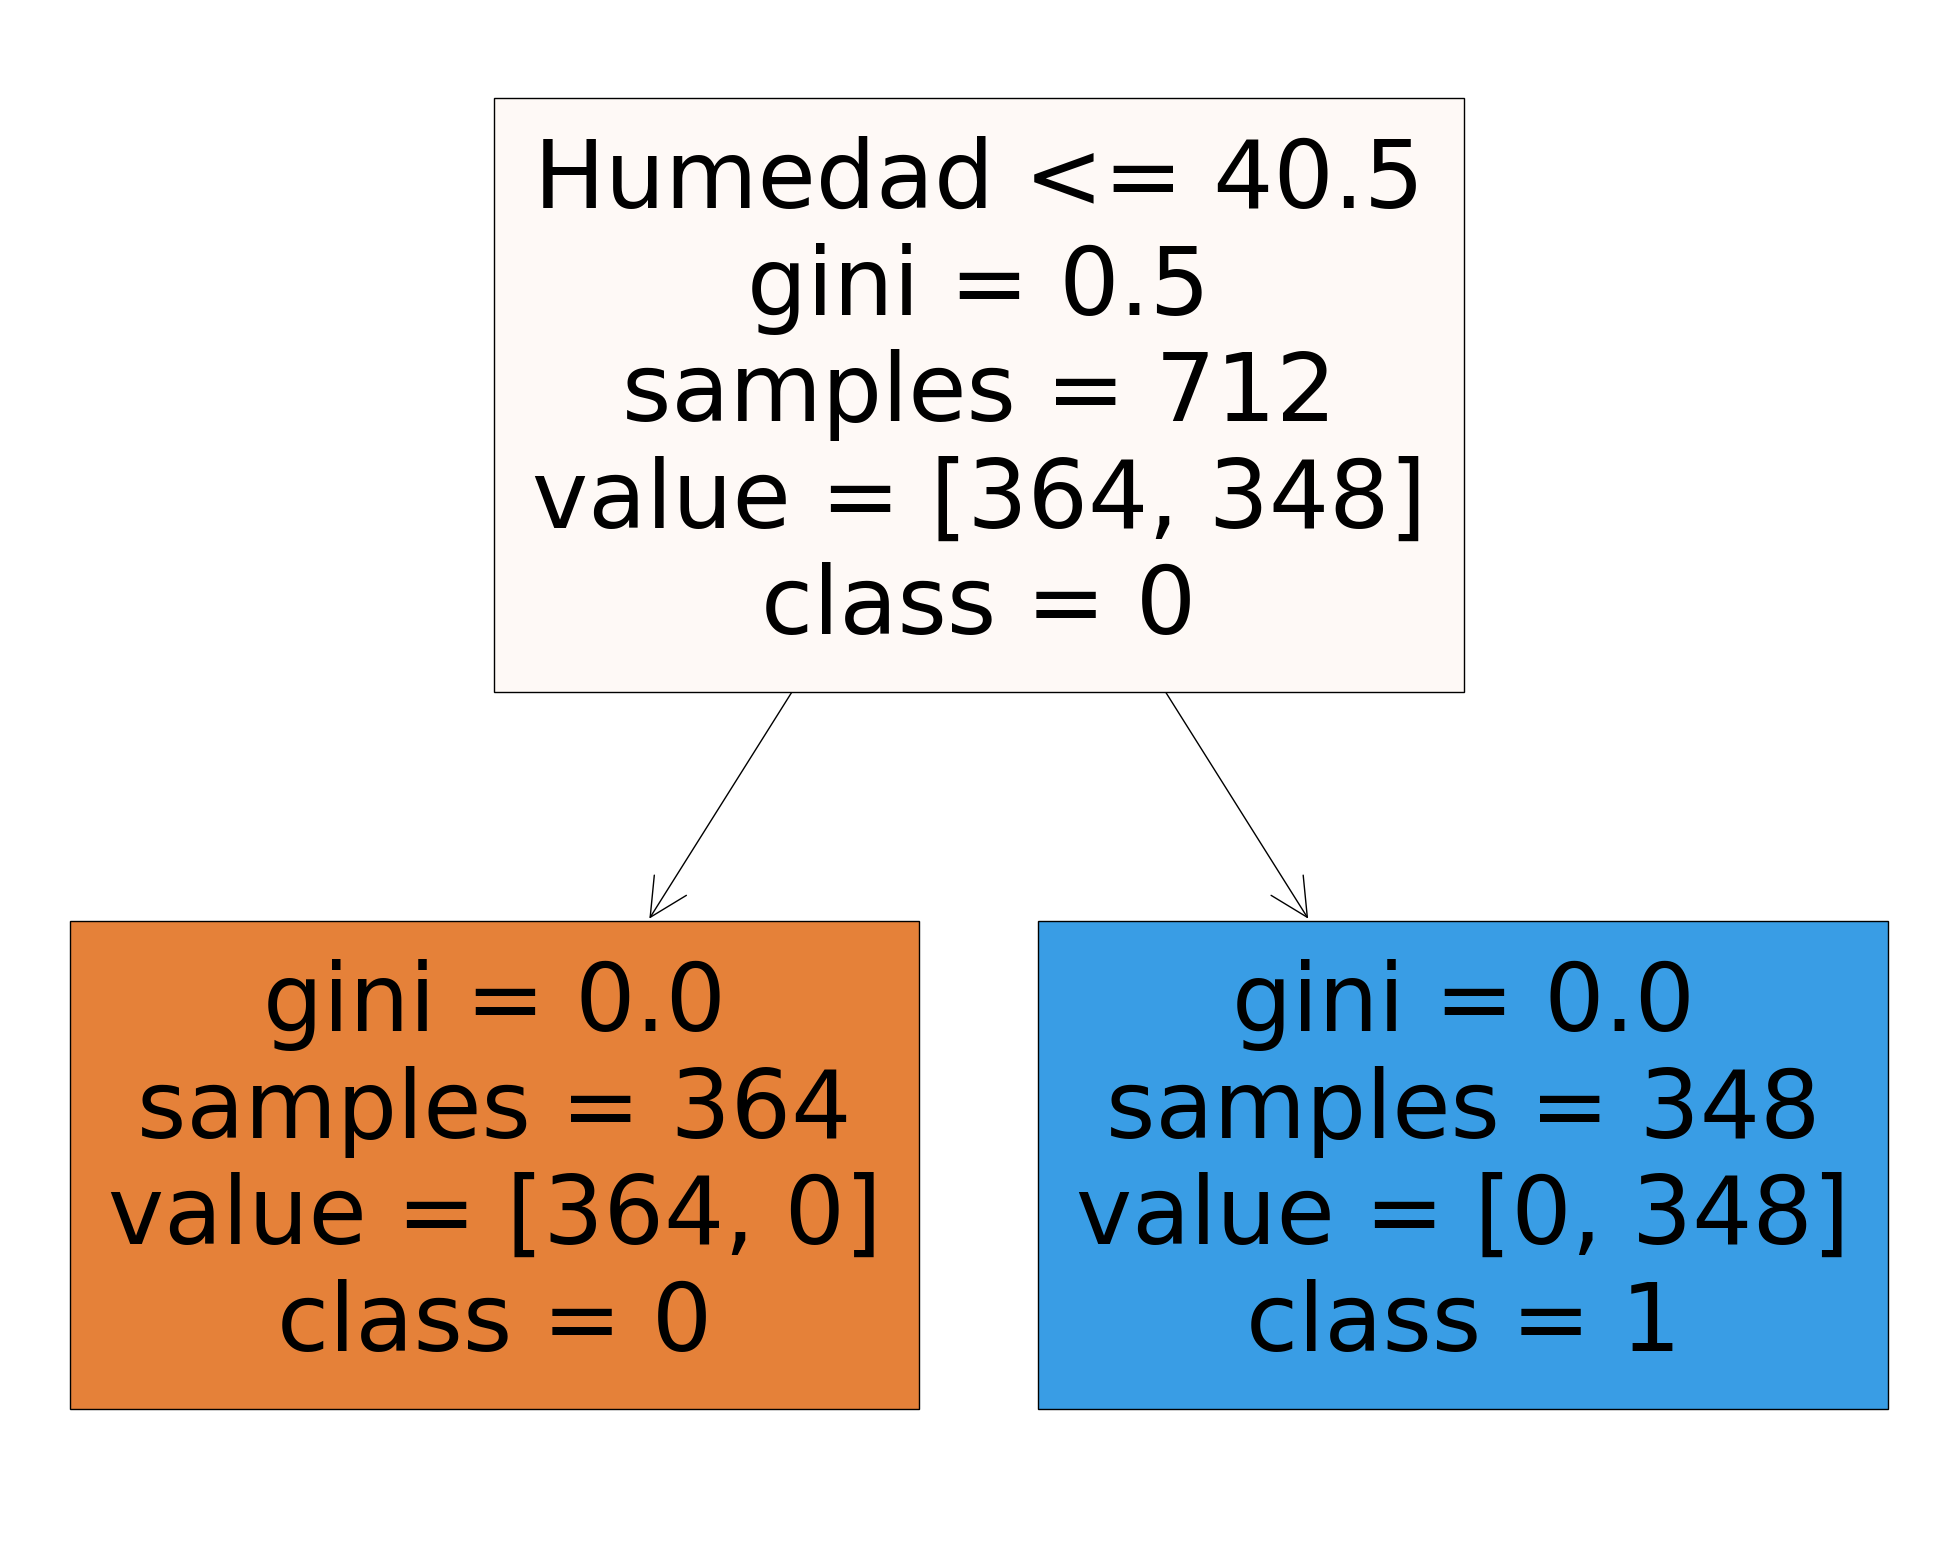

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names=['0','1'],
                   filled=True)


# Using graphviz

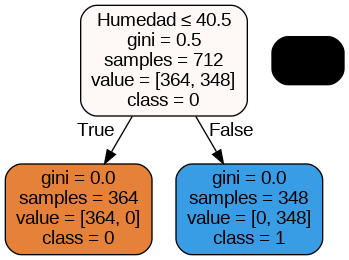

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

# Plot tree with dtreeviz

In [ ]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 860.0 kB/s eta 0:00:00


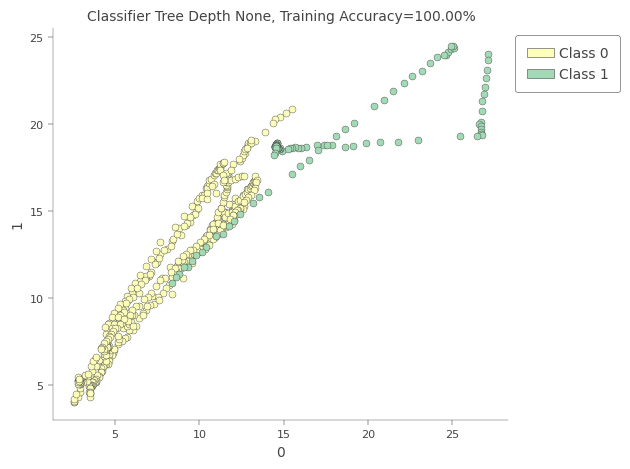

In [ ]:
# from dtreeviz.trees import ctreeviz_bivar
from dtreeviz import model

y = y.astype(int)
y_pred = clf.predict(X).astype(int)

# ct = ctreeviz_bivar(clf, X, y, feature_names = ['0','1'],fontname='DejaVu Sans')
ct = model(clf, X, y, feature_names = ['0','1'])
ct.ctree_feature_space(fontname='DejaVu Sans')

plt.tight_layout()
plt.show()

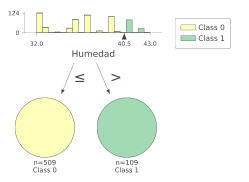

In [ ]:
from dtreeviz import model

ct = model(clf, X, y, feature_names = feature_names)
ct.view(fontname='DejaVu Sans')

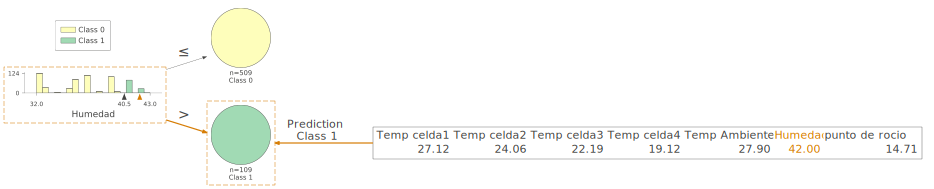

In [ ]:
x = X[0]

ct.view(fontname='DejaVu Sans',
        x=x,
        orientation="LR")

# Entrenar el clasificador y resultados

In [ ]:
feature_names = X_data.columns.to_list()[:-1]

print(f"Nombres de las features: {feature_names}")

Nombres de las features: ['Temp celda1', 'Temp celda2', 'Temp celda3', 'Temp celda4', 'Temp Ambiente', 'Humedad', 'punto de rocio']


In [ ]:
X = X_data.loc[:,feature_names].values
y = X_data['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

# selector = SelectKBest(k=5)
selector = VarianceThreshold(0.25)
scaler = MinMaxScaler()
clf = DecisionTreeClassifier()

pl = Pipeline([('selector',selector),
               ('escalador',scaler),
               ('clasificador',clf)])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Ajustamos la variable de destino codificada
pl.fit(X_train, y_train)
pl.score(X_train,y_train)

1.0

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
y_pred = pl.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),3)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    # "selector__k": [2,3,4,5,6],
    "selector__threshold": [0,0.1,0.2,0.5],
    "clasificador__criterion": ['gini','entropy','log_loss'],
    "clasificador__max_depth": [None,10,20],
    "clasificador__min_samples_split": [2,3,4]
}

search = GridSearchCV(pl, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


Best parameter (CV score=1.000):
{'clasificador__criterion': 'gini', 'clasificador__max_depth': None, 'clasificador__min_samples_split': 2, 'selector__threshold': 0}


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

selector = SelectKBest(k=4)
# selector = VarianceThreshold(0)
scaler = MinMaxScaler()
clf = DecisionTreeClassifier(criterion='log_loss',
                             max_depth=10,
                             min_samples_split=4)

pl = Pipeline([('selector',selector),
               ('escalador',scaler),
               ('clasificador',clf)])

pl.fit(X_train,y_train)
pl.score(X_train,y_train)

1.0

In [ ]:
y_pred = pl.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),3)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


# Comparación de métricas en predicción de datos

Regresión lineal  

Score: 0.988178736480052

Redes neuronales artificiales

Score: 0.9840607072335024

# Comparación de métricas catalogar clases de datos

SVM

In [ ]:
acc = round((CM2[1,1]+CM2[0,0])/(CM2[0,0] + CM2[0,1]+CM2[1,0] + CM2[1,1])*100,3)
rec = round(CM2[1,1]/(CM2[1,0] + CM2[1,1])*100,3)

print(f"Accuracy: {acc}")
print(f"Recall: {rec}")

Accuracy: 100.0
Recall: 100.0


Arboles de decisión

In [ ]:
y_pred = pl.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),3)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
